In [1]:
import os
from glob import glob
import sys
sys.path.append('../scms_py')
from scMSData import scMSData
from analysis import scMSAnalysis

from microMSData import microMSData
from processing import *
from tqdm import tqdm
import pandas as pd

from scipy.stats import spearmanr, ttest_ind
import seaborn as sns
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 


In [2]:
import ipywidgets as widgets
from ipywidgets import Box, IntSlider
#%matplotlib widget

In [7]:
scms = scMSData()
path = '20210825_AstroNeuron_and_Unfixed/Stained'
file_paths = scms.getXMLPath(path)
scms.loadXMLData()

100%|███████████████████████████████████████| 2398/2398 [01:19<00:00, 30.21it/s]


In [9]:
#scms.convertPeak2imzML(path)
scms.loadimzMLData('20210825_AstroNeuron_and_Unfixed/Stained.imzML')

TODO: convert indices into real world coordinates
loaded spectra
file loaded


In [10]:
scms.getIntensMtxData(ppm=5, feature_n=0.1, mz_range=(400,1100))

number of mass bins 101162


100%|████████████████████████████████| 101162/101162 [00:05<00:00, 19515.29it/s]


In [15]:
scms.intens_mtx

,400.084008,400.088009,400.292105,401.157666,401.274018,401.322174,402.089428,402.177897,404.294872,404.298915,...,1099.058841,1099.630497,1099.641494,1099.652490,1099.850444,1099.861443,1099.916437,1099.927436,1099.993433,1100.004433
x_78670y_14905,0.000000,0.000000,0.000000,0.000000,47354.800781,0.0,0.0,0.000000,0.0,86690.203125,...,0.000000,0.000000,0.00000,0.0,0.0,89995.296875,0.0,0.000000,0.0,0.000000
x_75424y_12641,0.000000,0.000000,0.000000,0.000000,58650.500000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,76516.898438,0.0,0.000000
x_53921y_23026,0.000000,0.000000,0.000000,48472.800781,76569.000000,0.0,0.0,0.000000,0.0,54752.699219,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,109299.703125
x_72249y_20711,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,470738.609375,...,0.000000,0.000000,236176.90625,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
x_68860y_20467,0.000000,49708.398438,0.000000,0.000000,76798.796875,0.0,0.0,0.000000,94790.0,161746.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,129846.703125,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x_28214y_13828,0.000000,45339.101562,0.000000,0.000000,0.000000,41186.5,0.0,41062.199219,0.0,0.000000,...,78465.601562,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
x_33332y_14810,64534.199219,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,95883.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
x_28701y_13272,44070.500000,0.000000,44620.199219,0.000000,0.000000,0.0,0.0,37858.199219,0.0,0.000000,...,88093.703125,154306.296875,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
x_79867y_10375,0.000000,41247.699219,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,136161.703125,0.000000,76449.50000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [11]:
file_dir = './20210825_AstroNeuron_and_Unfixed'

coords_file_paths = [file_dir+'/Stained/Slide1_AstroNeuron/Cells_45minsize_dist.txt',
                    file_dir+'/Stained/Slide2_AstroNeuron/Cells2_dist.txt']
image_path_dicts = [{'bf':(file_dir+'/Slide1_AstroNeuron_GFAP_L1CAM_081421/c1.tif',0),
                    'dapi':(file_dir+'/Slide1_AstroNeuron_GFAP_L1CAM_081421/c2.tif',2),
                    'L1CAM':(file_dir+'/Slide1_AstroNeuron_GFAP_L1CAM_081421/c3.tif',0)},
                   {'bf':(file_dir+'/Slide2_AstroNeuron_GFAP_L1CAM_081421/c1.tif',0),
                    'dapi':(file_dir+'/Slide2_AstroNeuron_GFAP_L1CAM_081421/c2.tif',2),
                    'L1CAM':(file_dir+'/Slide2_AstroNeuron_GFAP_L1CAM_081421/c3.tif',0)}]

In [12]:
microms = microMSData(coords_file_paths, image_path_dicts)
microms.getCellImgs(crop_size=32)

processing bf image
parsing 1230 coordinates for cell locations...
processing dapi image
parsing 1230 coordinates for cell locations...
processing L1CAM image
parsing 1230 coordinates for cell locations...
processing bf image
parsing 1168 coordinates for cell locations...
processing dapi image
parsing 1168 coordinates for cell locations...
processing L1CAM image
parsing 1168 coordinates for cell locations...


In [13]:
cell_select = widgets.interactive(microms.select_micromsIntens,
                                   channel1=list(image_path_dicts[0].keys()),
                                   channel2=list(image_path_dicts[0].keys()));

In [14]:
cell_select

interactive(children=(Dropdown(description='channel1', options=('bf', 'dapi', 'L1CAM'), value='bf'), Dropdown(…

In [104]:
plt.savefig('figures/microms_intens.pdf')

In [16]:
cell_show = widgets.interactive(microms.show_cellImgs,
                                       name=microms.obs.index[microms.obs['use']==True]);

In [17]:
cell_show
#x_50769y_16421,x_68122y_14151,x_67470y_16314

interactive(children=(Dropdown(description='name', options=('x_26026y_14136', 'x_27304y_17774', 'x_24821y_1891…

In [110]:
plt.savefig('figures/cell_stain3.pdf')

In [21]:
sc_data = scms.intens_mtx[microms.obs['use']]

/var/folders/gw/5vpnntfj7dg102qjxmy0d4yh0000gn/T/ipykernel_70581/3144840360.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sc_data = scms.intens_mtx[microms.obs['use']]


In [22]:
sc_icc = scMSAnalysis()
sc_icc.preprocessing(sc_data,norm_method='rms',feat_drop_rate=0.05,cell_drop_rate=0.05)

filtered intensity matrix with shape (516, 8186)


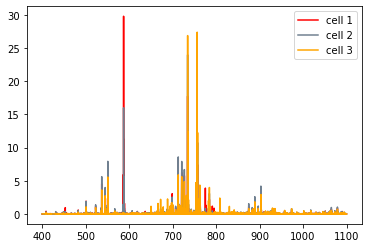

In [23]:
cell1 = sc_icc.intens_mtx.loc['x_50769y_16421']
cell2 = sc_icc.intens_mtx.loc['x_68122y_14151']
cell3 = sc_icc.intens_mtx.loc['x_67470y_16314']
plt.figure()
plt.plot(sc_icc.intens_mtx.columns.astype(float),cell1,c='red',label='cell 1')
plt.plot(sc_icc.intens_mtx.columns.astype(float),cell2,c='slategray',label='cell 2')
plt.plot(sc_icc.intens_mtx.columns.astype(float),cell3,c='orange',label='cell 3')
plt.legend()

In [138]:
plt.savefig('figures/sc_spectra_cells.pdf')

In [24]:
sc_icc.analyze(n_neighbors=30, n_pcs=30, min_dist=0.7, resolution = 0.3, categories=['leiden'])

computing neighbors..
performing umap...
performing clustering...


In [25]:
show_embed = widgets.interactive(sc_icc.show_cellEmbed, label=sc_icc.adata.obs.columns,
                                 embed_method=sc_icc.adata.obsm.keys(),size=(0.5,10,0.1));

In [26]:
show_embed

interactive(children=(Dropdown(description='label', options=('leiden',), value='leiden'), Dropdown(description…

In [141]:
plt.savefig('figures/umap_immuno_neuron.pdf')

In [78]:
# cluster = '1'
# # cell_show = widgets.interactive(microms.show_cellImgs,
# #                                        name=adata.obs[adata.obs['leiden']==cluster].index);
# spectra_show = widgets.interactive(microms.show_spectra,
#                                        spectra=adata.obs[adata.obs['leiden']==cluster].index);

In [31]:
cluster = '4'
cell_show = widgets.interactive(microms.show_cellImgs,
                                       name=sc_icc.adata.obs[sc_icc.adata.obs['leiden']==cluster].index);
# spectra_show = widgets.interactive(microms.show_spectra,
#                                        spectra=adata.obs[adata.obs['leiden']==cluster].index);

In [28]:
cell_show

interactive(children=(Dropdown(description='name', options=('x_74322y_11687', 'x_73886y_12843', 'x_27923y_1829…

In [32]:
sc_icc.get_labels(['leiden'])

In [33]:
label = 'leiden'
show_feat = widgets.interactive(sc_icc.show_featrank, label = label, region = sc_icc.label_class[label], 
                                rank_by=sc_icc.feat_rank[label].keys(), num_select=10000,
                                num_show=IntSlider(min=0, max=10000, step=20, value=0));

In [34]:
show_feat

interactive(children=(Text(value='leiden', description='label'), Dropdown(description='region', options=('0', …

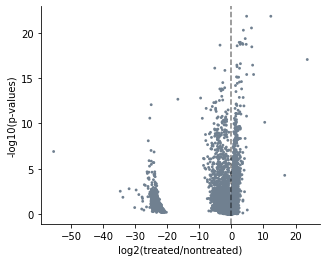

In [35]:
fig,axes = plt.subplots(1,1,figsize=(5,4))
axes.scatter(show_feat.result['logfoldchanges'],show_feat.result['pvals_adj'],s=8,c='slategray',edgecolors='none')
axes.axvline(0,linestyle='--',c='k',alpha=0.5)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('log2(treated/nontreated)')
plt.ylabel('-log10(p-values)')
#plt.xlim([-6,6])
plt.show()
#plt.savefig('figures/volcano_str.pdf')

In [208]:
plt.savefig('figures/volcano_cluster4.pdf')

In [212]:
#common_lev_mz = list(set(mz_lev[0])&set(mz_lev[1])&set(mz_lev[2])&set(mz_lev[3]))
from analysis import *

adducts = ['M+H','M+Na','M+K']
site_url = 'https://www.lipidmaps.org/rest/moverz/LIPIDS'

annot_df, matched, unmatched = LipidMaps_annotate(['697.4995','754.6178'], adducts, 5, site_url)

100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.14s/it]


In [213]:
annot_df

,Input m/z,Matched m/z,Delta,Name,Formula,Ion
0,697.4995,697.5014,0.0019,LPG 30:0;O,C36H74O10P,[M+H]+
1,697.4995,697.5014,0.0019,PG O-30:0;O,C36H74O10P,[M+H]+
2,697.4995,697.5014,0.0019,DG 38:5;O2,C41H70O7Na,[M+Na]+
3,697.4995,697.5014,0.0019,TG 38:4;O,C41H70O7Na,[M+Na]+
4,697.4995,697.5014,0.0019,TG O-38:5;O2,C41H70O7Na,[M+Na]+
5,697.4995,697.5015,0.0020,TG O-35:0;O3,C38H74O8K,[M+K]+
6,754.6178,754.6191,0.0013,ACer 44:2;O6,C44H84NO8,[M+H]+
7,754.6178,754.6191,0.0013,DGCC 34:1,C44H84NO8,[M+H]+
8,754.6178,754.6191,0.0013,HexCer 38:2;O2,C44H84NO8,[M+H]+


In [193]:
show_featdist = widgets.interactive(sc_icc.show_featdist, features=show_feat.result['feature names'].astype(str),
                                 embed_method=sc_icc.adata.obsm.keys(),size=(0.5,10,0.1));
show_featdist

interactive(children=(Dropdown(description='features', options=('713.0501', '697.4995', '727.0473', '758.5823'…

In [206]:
plt.savefig('figures/umap_mz754.pdf')